### <h1 style='text-align: center'>  Linear Regression </h1> ###  

Linear Regression Models are good starting point for regression tasks. 

They can fit very quickly and are very ineterpretable. 

We can fit a straight line in 2D, plane in 3D, or hyperplane in higher dimensions. 

Non-linear relationship between x and y can also be transformed and fitted linearly via **Polynomial Basis functions** or **Gaussian Basis functions**. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

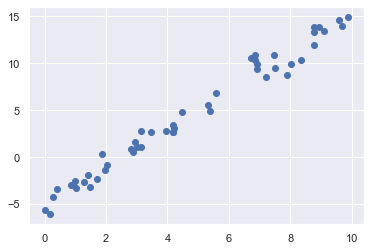

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

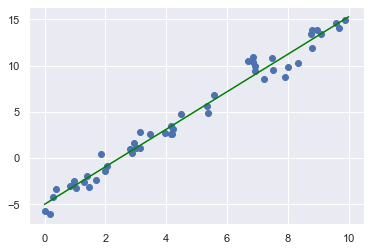

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit, c='green')

In [7]:
#print the slope and intercept

print('Model slope:', model.coef_[0])
print('Model intercept:', model.intercept_)

Model slope: 2.027208810360695
Model intercept: -4.998577085553202


**Multi-Dimentional Linear Model**

                    y = a0 + a1 x1 + a2x2 +⋯   
                    
                    
Instead of a straigh-lit fit, we find a plane in 3D or hyper-plane in higher dimensions. 


In [8]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


**Non-Linear Regression**

To adapt linear regression to nonlinear relationships, we need to transform the data 

**1. Polynomial Projection**  

- Using the hPlynomialFeature transformer in Scikit-Learn 

**2. Gaussian Basis**  

- Fit the model using sum of Gaussian bases 
- No Sci-kit Learn function, but can write custom transfomer 

In [10]:
# polynmical basis functions 

from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [12]:
from sklearn.pipeline import make_pipeline

poly_model =  make_pipeline(PolynomialFeatures(7), LinearRegression())

With the transformer in place, we can use linear model to fit complicated relationship between x and y 

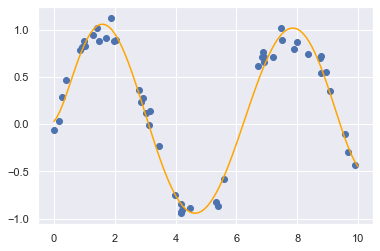

In [13]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit, c='orange')

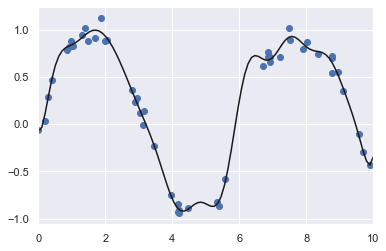

In [15]:
# Gaussian Basis Functions 

from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, c='k')
plt.xlim(0, 10);

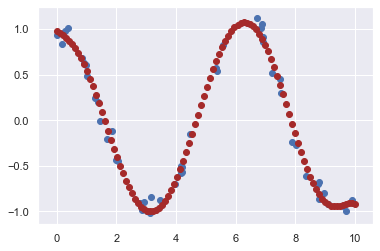

In [17]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.cos(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.scatter(xfit, yfit, c='brown')